## Importing the dataset from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle competitions download -c cifar-10

 97% 693M/715M [00:04<00:00, 215MB/s]
100% 715M/715M [00:04<00:00, 158MB/s]


In [ ]:
!unzip cifar-10.zip -d cifar-10

Archive:  cifar-10.zip
  inflating: cifar-10/sampleSubmission.csv  
  inflating: cifar-10/test.7z        
  inflating: cifar-10/train.7z       
  inflating: cifar-10/trainLabels.csv  


In [ ]:
%cd cifar-10

/content/gdrive/MyDrive/Kaggle/cifar-10


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
import py7zr

archive_path = "/content/gdrive/MyDrive/Kaggle/cifar-10/train.7z"

with py7zr.SevenZipFile(archive_path, mode='r') as z:
    z.extractall()

## Installing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from PIL import Image

## Getting the independent and the dependent variables

In [ ]:
filesname_number = [int(filename.replace('.png', '')) for filename in os.listdir('/content/gdrive/MyDrive/Kaggle/cifar-10/train')]
filesname_number.sort()
filesname = [str(filename_number) + '.png' for filename_number in filesname_number]

In [ ]:
%cd train

/content/gdrive/MyDrive/Kaggle/cifar-10/train


In [ ]:
images_list = []
for filename in filesname:
  img = Image.open(filename)
  img_array = np.array(img)
  images_list.append(img_array)

In [ ]:
os.chdir('..')

In [ ]:
labels = pd.read_csv('trainLabels.csv')

In [ ]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [ ]:
labels['label'].replace({'frog': 0,
                         'truck': 1,
                         'deer': 2,
                         'automobile': 3,
                         'bird': 4,
                         'horse': 5,
                         'ship': 6,
                         'cat': 7,
                         'dog': 8,
                         'airplane': 9}, inplace=True)

In [ ]:
labels.head()

,id,label
0,1,0
1,2,1
2,3,1
3,4,2
4,5,3


In [ ]:
X = np.array(images_list)
y = labels['label'].values

In [ ]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


## Splitting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


## Normalizing the features

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Building the CNN from scratch

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 2.0107 - accuracy: 0.2620 - val_loss: 1.9358 - val_accuracy: 0.3047
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8817 - accuracy: 0.3178 - val_loss: 1.9371 - val_accuracy: 0.2837
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8481 - accuracy: 0.3329 - val_loss: 1.8458 - val_accuracy: 0.3383
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8274 - accuracy: 0.3404 - val_loss: 1.8188 - val_accuracy: 0.3410
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8104 - accuracy: 0.3451 - val_loss: 1.8033 - val_accuracy: 0.3487
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8080 - accuracy: 0.3530 - val_loss: 1.8299 - val_accuracy: 0.3363
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7984 - accuracy: 0.3541 - val_loss: 1.8068 - val_accuracy:

## Using the Resnet50 architecture

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
convolutional_base = ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import RMSprop

In [ ]:
model1 = Sequential()
model1.add(UpSampling2D((2,2)))
model1.add(UpSampling2D((2,2)))
model1.add(UpSampling2D((2,2)))
model1.add(convolutional_base)
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 469s 398ms/step - loss: 1.6088 - accuracy: 0.4617 - val_loss: 0.8786 - val_accuracy: 0.7560
Epoch 2/10
1125/1125 [==============================] - 445s 395ms/step - loss: 0.9617 - accuracy: 0.7137 - val_loss: 0.4722 - val_accuracy: 0.8907
Epoch 3/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.7147 - accuracy: 0.8126 - val_loss: 0.3487 - val_accuracy: 0.9220
Epoch 4/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.5457 - accuracy: 0.8752 - val_loss: 0.2953 - val_accuracy: 0.9250
Epoch 5/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.4299 - accuracy: 0.9101 - val_loss: 0.2579 - val_accuracy: 0.9323
Epoch 6/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.3407 - accuracy: 0.9370 - val_loss: 0.2436 - val_accuracy: 0.9352
Epoch 7/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.2710 - accuracy: 0.9536 - val_

## Evaluating the trained model on the test set

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)

313/313 [==============================] - 36s 108ms/step - loss: 0.2226 - accuracy: 0.9399


## Visualizing the loss and the accuracy for the training set and the cross validation set

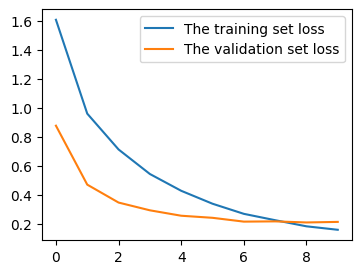

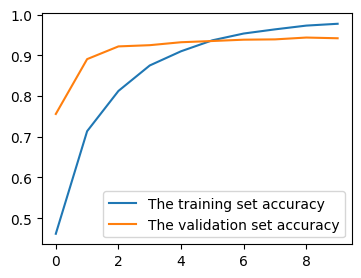

In [ ]:
h = history

# Plotting the loss for the training set and the test set
plt.figure(figsize=(4,3))
plt.plot(h.history['loss'], label='The training set loss')
plt.plot(h.history['val_loss'], label='The validation set loss')
plt.legend()
plt.show()

# Plotting the accuracy for the training set and the cross validation set
plt.figure(figsize=(4,3))
plt.plot(h.history['accuracy'], label='The training set accuracy')
plt.plot(h.history['val_accuracy'], label='The validation set accuracy')
plt.legend()
plt.show()